In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [3]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,models

In [4]:
kaggle_credentials = json.load(open('/content/drive/MyDrive/kaggle API/kaggle.json'))

In [5]:
# setting up kaggle api environment
os.environ['KAGGLE_USERNAME'] = kaggle_credentials['username']
os.environ['KAGGLE_KEY'] = kaggle_credentials['key']

In [6]:
!kaggle datasets download -d l33tc0d3r/indian-food-classification

 99% 1.47G/1.48G [00:16<00:00, 168MB/s]
100% 1.48G/1.48G [00:16<00:00, 95.7MB/s]


In [7]:
#unzipping dataset
with ZipFile('/content/indian-food-classification.zip', 'r') as zip_ref:
  zip_ref.extractall()

In [9]:
print(os.listdir('/content/Food Classification'))
print(len(os.listdir('/content/Food Classification')))

['jalebi', 'fried_rice', 'burger', 'pav_bhaji', 'masala_dosa', 'pizza', 'chole_bhature', 'pakode', 'butter_naan', 'idli', 'samosa', 'kadai_paneer', 'paani_puri', 'dhokla', 'kaathi_rolls', 'momos', 'chapati', 'dal_makhani', 'chai', 'kulfi']
20


In [10]:
#dataset path
base_dir = '/content/Food Classification'

(563, 564, 3)


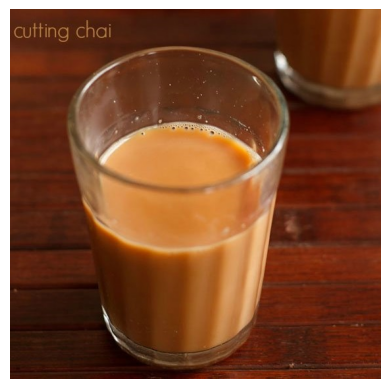

In [14]:
image_path = '/content/Food Classification/chai/010.jpg'

#reading image
img = mpimg.imread(image_path)
print(img.shape)
#plotting image
plt.imshow(img)
plt.axis('off')
plt.show()

In [15]:
#image parameters
img_size=224
batch_size=32

In [16]:
#image generator
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [18]:
#train generator
train_gen = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    subset="training",
    class_mode="categorical"
)

Found 5024 images belonging to 20 classes.


In [19]:
#validation generator
val_gen = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    subset="validation",
    class_mode="categorical"
)

Found 1245 images belonging to 20 classes.


In [20]:
#model
pretrained_model = tf.keras.applications.MobileNetV2(
  input_shape=(224,224,3),
  include_top=False,
  weights='imagenet',
  pooling='avg'

)
pretrained_model.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [21]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
#128 neurons
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(20, activation='softmax')(x)
#classification layer
model = tf.keras.Model(inputs, outputs)


print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

In [22]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [23]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='validation_loss',
            patience=3,
            #when validation loss stops improving for 3 consecutive epochs training will be stopped and best epochs weights are restored
            restore_best_weights=True
        )
    ]
)

Epoch 1/10
157/157 [==============================] - ETA: 0s - loss: 1.3710 - accuracy: 0.6111

157/157 [==============================] - 111s 657ms/step - loss: 1.3710 - accuracy: 0.6111 - val_loss: 0.4933 - val_accuracy: 0.8554
Epoch 2/10
157/157 [==============================] - ETA: 0s - loss: 0.6295 - accuracy: 0.8181

157/157 [==============================] - 101s 646ms/step - loss: 0.6295 - accuracy: 0.8181 - val_loss: 0.4039 - val_accuracy: 0.8827
Epoch 3/10
157/157 [==============================] - ETA: 0s - loss: 0.4364 - accuracy: 0.8766

157/157 [==============================] - 129s 823ms/step - loss: 0.4364 - accuracy: 0.8766 - val_loss: 0.3907 - val_accuracy: 0.8795
Epoch 4/10
157/157 [==============================] - ETA: 0s - loss: 0.3082 - accuracy: 0.9082

157/157 [==============================] - 105s 672ms/step - loss: 0.3082 - accuracy: 0.9082 - val_loss: 0.3973 - val_accuracy: 0.8787
Epoch 5/10
157/157 [==============================] - ETA: 0s - loss: 0.2022 - accuracy: 0.9429

157/157 [==============================] - 103s 658ms/step - loss: 0.2022 - accuracy: 0.9429 - val_loss: 0.4023 - val_accuracy: 0.8763
Epoch 6/10
157/157 [==============================] - ETA: 0s - loss: 0.1309 - accuracy: 0.9680

157/157 [==============================] - 127s 810ms/step - loss: 0.1309 - accuracy: 0.9680 - val_loss: 0.4075 - val_accuracy: 0.8803
Epoch 7/10
157/157 [==============================] - ETA: 0s - loss: 0.0731 - accuracy: 0.9863

157/157 [==============================] - 115s 729ms/step - loss: 0.0731 - accuracy: 0.9863 - val_loss: 0.4263 - val_accuracy: 0.8811
Epoch 8/10
157/157 [==============================] - ETA: 0s - loss: 0.0354 - accuracy: 0.9960

157/157 [==============================] - 142s 906ms/step - loss: 0.0354 - accuracy: 0.9960 - val_loss: 0.4471 - val_accuracy: 0.8843
Epoch 9/10
157/157 [==============================] - ETA: 0s - loss: 0.0185 - accuracy: 0.9992

157/157 [==============================] - 124s 789ms/step - loss: 0.0185 - accuracy: 0.9992 - val_loss: 0.4289 - val_accuracy: 0.8972
Epoch 10/10
157/157 [==============================] - ETA: 0s - loss: 0.0099 - accuracy: 0.9996

157/157 [==============================] - 123s 789ms/step - loss: 0.0099 - accuracy: 0.9996 - val_loss: 0.4753 - val_accuracy: 0.8867


In [24]:
results = model.evaluate(val_gen, verbose=0)
#gives loss and accuracy for test set
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Accuracy: 88.67%


In [25]:
from sklearn.metrics import confusion_matrix, classification_report
predictions = np.argmax(model.predict(val_gen), axis=1)

cm = confusion_matrix(val_gen.labels, predictions)
clr = classification_report(val_gen.labels, predictions, target_names=val_gen.class_indices, zero_division=0)

39/39 [==============================] - 24s 592ms/step


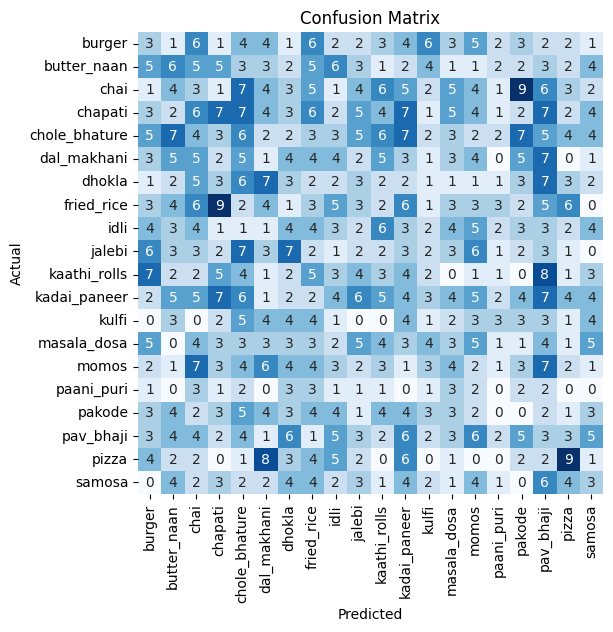

In [27]:
import seaborn as sns
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=np.arange(20) + 0.5, labels=val_gen.class_indices, rotation=90)
plt.yticks(ticks=np.arange(20) + 0.5, labels=val_gen.class_indices, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [28]:
# print("Classification Report:\n----------------------\n", clr)

In [29]:
#predictive system
def load_and_preprocess_image(image_path, img_size=(224, 224)):
  #load image
  img = Image.open(image_path)
  #resize image
  img = img.resize(img_size)
  #convert to array
  img_array= np.array(img)
  #adding dimension
  img_array = np.expand_dims(img, axis=0)
  #normalize
  img_array= img_array.astype('float32')/255.
  return img_array

def predict_image_class(image_path, model,class_indices):
  preprocessed_image = load_and_preprocess_image(image_path)
  prediction = model.predict(preprocessed_image)
  predicted_class_index = np.argmax(prediction,axis=1)[0]
  predicted_class = class_indices[predicted_class_index]
  return predicted_class


In [30]:
class_indices = dict((v,k) for k,v in train_gen.class_indices.items())
print(class_indices)

{0: 'burger', 1: 'butter_naan', 2: 'chai', 3: 'chapati', 4: 'chole_bhature', 5: 'dal_makhani', 6: 'dhokla', 7: 'fried_rice', 8: 'idli', 9: 'jalebi', 10: 'kaathi_rolls', 11: 'kadai_paneer', 12: 'kulfi', 13: 'masala_dosa', 14: 'momos', 15: 'paani_puri', 16: 'pakode', 17: 'pav_bhaji', 18: 'pizza', 19: 'samosa'}


In [31]:
#saving the class indices as json file
with open('class_indices.json', 'w') as f:
  json.dump(class_indices, f)

In [34]:
#example
image_path = '/content/Food Classification/fried_rice/008.jpg'
preddicted_class = predict_image_class(image_path, model, class_indices)
print("Predicted Class:", preddicted_class)

1/1 [==============================] - 0s 53ms/step
Predicted Class: fried_rice


In [35]:
#saving ther model
model.save('drive/MyDrive/Deeplearning_project/final_food_classification_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [36]:
model.save('final_food_classification_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
